# Steps
* Import
* Load Data
* Handle missing values
* Encode categorical data
* Split the dataset
* Standardize data 
* Perform Linear Regression
* Perform Decision Tree Regression
* Perform Random Forest Regression
* Evaluate regression models by using RMSE error
* Perform Linear Regression with one independent variable - median income or other

# Initial Imports + loading data

In [1]:
import pandas as pd
import numpy as np

c:\program files (x86)\python35-32\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  return f(*args, **kwds)
c:\program files (x86)\python35-32\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 56, got 52
  return f(*args, **kwds)


In [2]:
dataset = pd.read_csv("housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

# Finding and replacing NaN values

In [4]:
def checknan(name):
    if (name == 'ocean_proximity'):
        return False
    else:
        return np.isnan(dataset[name]).any()

In [5]:
for elem in dataset.columns:
    print(checknan(elem))

False
False
False
False
True
False
False
False
False
False


In [6]:
# We have nan values in the 5th column - total_bedrooms
checknan('total_bedrooms')

True

In [7]:
# filling nan
dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(np.mean(dataset['total_bedrooms']))

In [8]:
# Checking nan
checknan('total_bedrooms')

False

# Encoding categorical data

In [9]:
myset = set(dataset['ocean_proximity'])
print(myset)

{'INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'}


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
dataset['ocean_proximity'] = le.fit_transform(dataset['ocean_proximity'])

In [12]:
print (dataset.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  median_house_value  
0         322         126         8.3252                3              452600  
1        2401        1138         8.3014                3              358500  
2         496         177         7.2574                3              352100  
3         558         219         5.6431                3              341300  
4         565         259         3.8462                3              342200  


In [13]:
print (dataset.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


# Splitting dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = dataset.iloc[:,:9]

In [16]:
X.shape

(20640, 9)

In [17]:
Y = dataset.iloc[:,9]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [19]:
print (x_train.shape)

(16512, 9)


In [20]:
print (y_test.shape)

(4128,)


# Standardizing dataset

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
x_train = sc.fit_transform(x_train)

In [23]:
x_test = sc.transform(x_test)

In [24]:
sc2 = StandardScaler()
y_test = sc2.fit_transform(y_test.to_frame())
y_train = sc2.transform(y_train.to_frame())

# Performing Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

# Performing Decision Tree Regression

In [27]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [28]:
DTR.fit(x_train,y_train)
dtr_pred = DTR.predict(x_test)

# Performing Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

c:\program files (x86)\python35-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [30]:
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

c:\program files (x86)\python35-32\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


# Evaluating models with RMSE

In [31]:
from sklearn.metrics import mean_squared_error
lr_error = mean_squared_error(y_test,lr_pred)
dtr_error = mean_squared_error(y_test, dtr_pred)
rfr_error = mean_squared_error(y_test, rfr_pred)

In [32]:
print(lr_error)
print(dtr_error)
print(rfr_error)

0.3739235595179991
0.3482939512428579
0.20412066123625472


## Conclusion - Random Forest Regressor is the best

# Linear Regression w/ median-income

In [34]:
import matplotlib.pyplot as plt

In [35]:
x = dataset.iloc[:,7].to_frame()
y = dataset['median_house_value'].to_frame()

sc = StandardScaler()
x = sc.fit_transform(x)
sc2 = StandardScaler()
y = sc2.fit_transform(y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_test.shape)

(16512, 1)
(4128, 1)


In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

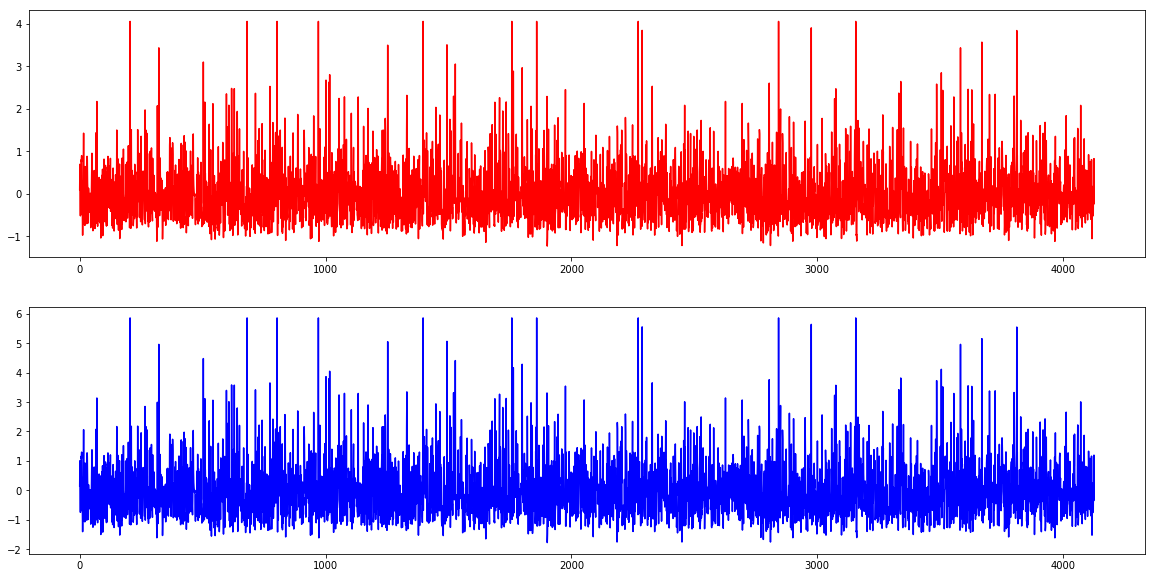

In [38]:
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(pred, 'r')
plt.subplot(212)
plt.plot(x_test, 'b')
plt.show()

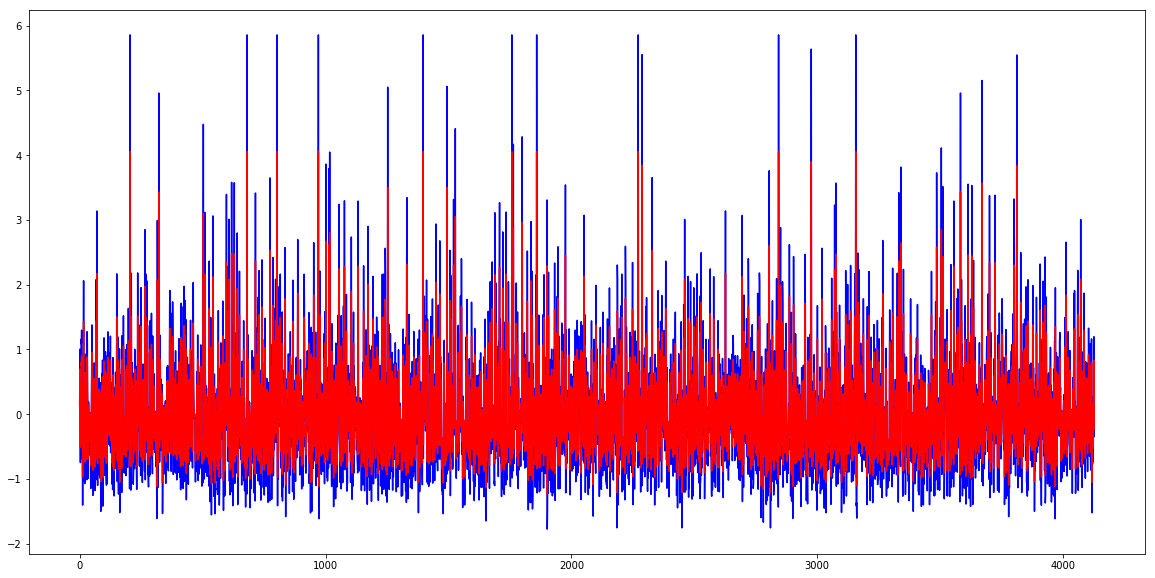

In [39]:
plt.figure(figsize=(20,10))
plt.plot(x_test, 'b')
plt.plot(pred, 'r')